In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import colorsys

import numpy as np
import pickle
import glob
import os

In [2]:
def load_data(path):    
    with open(path, 'rb') as f:                                        
        data = pickle.load(f)                                                   
    return data

def my_sigmoid(x):
    return 1/(1+np.exp(-4*x+2))

def holotanh(x):
    return x/(1 + np.exp(-x)) + (1-x)/(1 + np.exp(-(x-1)) )

def identity(x):
    return x

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """

    try:
        c = colors.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*colors.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

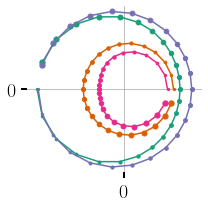

In [3]:
# Fig 2a) Left

rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25
rcParams['axes.titlesize'] = 30
rcParams['axes.labelsize'] = 25
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string

label_pad = 5
basic_colors = cm.get_cmap('Dark2').colors



runs = glob.glob('./results/fig2ac/*')
runs = sorted(runs, reverse=True)
run = runs[1]



data = load_data(run+'/neural_data.pickle')
act = identity
N = len(data['complex'])
free_eq = data['free_eq']
n_layers = len(free_eq)




for layer_idx in [1]:
    
    fig = plt.figure(figsize=(3, 3))
    
    complex_eqs = np.concatenate([data['complex'][str(t)][layer_idx] for t in range(N)], axis=0)
    neurons_in_layer = complex_eqs.shape[1]
    
    for neuron_idx in range(neurons_in_layer):
        
        s_star_beta = act(complex_eqs[:, neuron_idx].flatten())
        s_star_0 = act(free_eq[layer_idx][0, neuron_idx])
        delta_s = (s_star_beta - s_star_0)
        
        plt.plot(np.real(delta_s), np.imag(delta_s), color=basic_colors[neuron_idx])
        
        for t in range(N):
            sz = 5 + t
            plt.scatter(np.real(delta_s[t]), np.imag(delta_s[t]), s=sz, color=basic_colors[neuron_idx])
    
    
    
    axes = plt.gca()
    
    axes.set_axisbelow(True)
    axes.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.spines['left'].set_visible(False)
    
    axes.xaxis.set_ticks([0])
    
    # shape of major xticks
    axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                               pad=label_pad, which='major')


    # shape of minor xticks
    axes.xaxis.set_tick_params(direction='in', labelsize=25, length=3, width=3, top=False, bottom=False,
                               pad=label_pad, which='minor')


    axes.yaxis.set_ticks([0])

    # shape of major yticks
    axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                               pad=label_pad, which='major')

    # shape of minor yticks
    axes.yaxis.set_tick_params(direction='in', labelsize=25, length=3, width=3, right=False, left=False,
                               pad=label_pad, which='minor')
    
    axes.set_axisbelow(True)
    plt.axis('equal')
    plt.grid()
    
plt.show()

./results/fig2ac/2022-05-06_16-46-53_xp_mlp_toy_init5e-1_N24_mysig4_seed2_beta1e-1


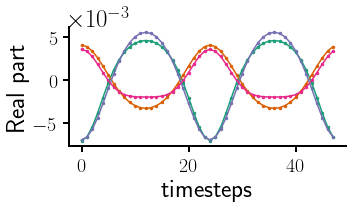

In [4]:
# Fig 2a) right

rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25
rcParams['axes.titlesize'] = 30
rcParams['axes.labelsize'] = 25
rcParams['lines.markersize'] = 5
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string
basic_colors = cm.get_cmap('Dark2').colors



runs = glob.glob('./results/fig2ac/*')
runs = sorted(runs, reverse=True)
run = runs[1]
print(run)
data = load_data(run+'/neural_data.pickle')
activation = identity
N = len(data['complex'])
free_eq = data['free_eq']
n_layers = len(free_eq)


    

for layer_idx in [1]:
    
    fig = plt.figure(figsize=(5, 3))
    
    complex_eqs = np.concatenate([data['complex'][str(t)][layer_idx] for t in range(N)], axis=0)
    neurons_in_layer = complex_eqs.shape[1]
    
    for neuron_idx in range(neurons_in_layer):
        
        s_star_beta = act(complex_eqs[:, neuron_idx].flatten())
        s_star_0 = act(free_eq[layer_idx][0, neuron_idx])
        delta_s = (s_star_beta - s_star_0)
        real_delta_s_x2 = np.concatenate([np.real(delta_s), np.real(delta_s)])
        
        plt.plot(real_delta_s_x2, color=basic_colors[neuron_idx])
        plt.scatter(np.arange(0, 2*N, 1), real_delta_s_x2, s=6, color=basic_colors[neuron_idx])
        

    
    axes = plt.gca()
    
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    
    axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # shape of major xticks
    axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                               pad=label_pad, which='major')


    # shape of minor xticks
    axes.xaxis.set_tick_params(direction='out', labelsize=25, length=3, width=2, top=False, bottom=True,
                               pad=label_pad, which='minor')

    axes.yaxis.set_ticks([-5e-3, 0, 5e-3])

    # shape of major yticks
    axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                               pad=label_pad, which='major')

    # shape of minor yticks
    axes.yaxis.set_tick_params(direction='out', labelsize=25, length=3, width=2, right=False, left=True,
                               pad=label_pad, which='minor')

    axes.set_axisbelow(True)
    plt.xlabel(r'$\text{timesteps}$')
    plt.ylabel(r'$\text{Real part}$')
plt.show()

./results/fig2b/2022-05-24_15-44-08_xp_mlp_toy


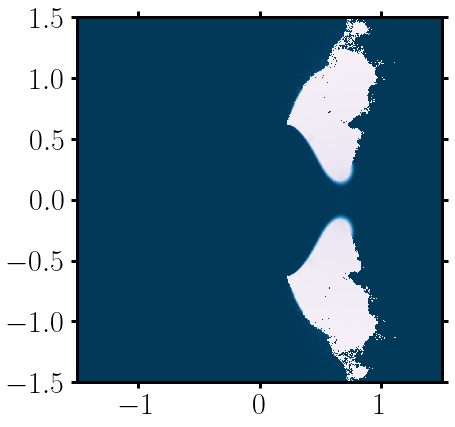

In [5]:
# plot fractal

runs = glob.glob('./results/fig2b/*')
runs = sorted(runs, reverse=True)

run = runs[0]
print(run)

data = load_data(run+'/data.pickle')


rcParams['axes.linewidth'] = 3
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25
rcParams['axes.titlesize'] = 30
rcParams['axes.labelsize'] = 20
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string



plt.figure(figsize=(6, 6))  

legend_size = 15
label_pad = 5

cmap_name = "PuBu_r"

xname = ''                          # r'$\operatorname{Re}(\beta)$'
xlim = data['xrange']               # (0.0, 1.0)
xticks = None                       # [xlim[0]/2, 0.0, xlim[1]/2]
minor_xticks = None                 # 10 (for every 10)

yname = ''                          # r'$\operatorname{Im}(\beta)$'
ylim = data['yrange']
yticks = None                       # [ylim[0]/2, 0.0, ylim[1]/2]
minor_yticks = None 

X, Y, z = data['dyn_stab'] 

plt.pcolor(X, Y, z,
           norm=colors.LogNorm(vmin=z.min(), vmax=z.max()),
           cmap=plt.cm.get_cmap(cmap_name),
           shading='auto')


axes = plt.gca()

axes.set_xlabel(xname, fontsize = 35)
if xticks:
    axes.xaxis.set_ticks(xticks)


# shape of major xticks
axes.xaxis.set_tick_params(direction='out', labelsize=30, length=6, width=3, top=True, bottom=True,
                           pad=label_pad, which='major')


# shape of minor xticks
axes.xaxis.set_tick_params(direction='in', labelsize=20, length=6, width=3, top=True, bottom=True,
                           pad=label_pad, which='minor')

if minor_xticks:
    axes.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_xticks))
if xlim:
    axes.set_xlim(*xlim)
if ylim:
    axes.set_ylim(*ylim)


axes.set_ylabel(yname, fontsize = 35)
if yticks:
    axes.yaxis.set_ticks(yticks)


# shape of major yticks
axes.yaxis.set_tick_params(direction='out', labelsize=30, length=6, width=3, right=True, left=True,
                           pad=label_pad, which='major')

# shape of minor yticks
axes.yaxis.set_tick_params(direction='in', labelsize=35, length=6, width=3, right=True, left=True,
                           pad=label_pad, which='minor')

if minor_yticks:
    axes.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_yticks))



plt.gca().set_aspect('equal')
plt.show()

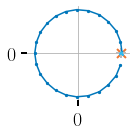

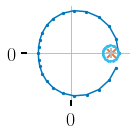

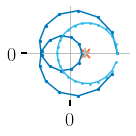

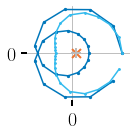

In [4]:
# Fig 2c)

rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25
rcParams['axes.titlesize'] = 30
rcParams['axes.labelsize'] = 25
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string

# basic_colors = [ '#332288', '#882255', '#CC6677', '#882255', '#88CCEE', '#117733',
#                 '#999933', '#DDCC77', '#CC6677', '#AA4499', "#EE7733", "#EE3377"]
basic_colors = ['#0077BB', '#33BBEE', '#EE7733', '#CCBB44']

label_pad = 5
runs = glob.glob('./results/fig2ac/*')
runs = sorted(runs, reverse=False)

for run in runs:

    data = load_data(f'{run}/neural_data.pickle')
    act = identity
    N = len(data['complex'])
    free_eq = data['free_eq']
    n_layers = len(free_eq)
    grad = data['grad']
    abs_beta = data['beta']
    complex_betas = abs_beta * np.exp( 2 * 1j * np.pi * np.arange(0, N, 1)/N )


    i, j = 3, 2
    layer = 2


    complex_eqs = []
    for layer_idx in range(n_layers):
        complex_eqs.append(np.concatenate([data['complex'][str(t)][layer_idx] for t in range(N)], axis=0))


    minus_grad = - grad[f'xphi/~/fc_{layer}']['w'][i,j]

    sisj_0 = act(free_eq[layer-1][0, i].flatten())  *  act(free_eq[layer][0, j].flatten())

    sisj_beta = act(complex_eqs[layer-1][:, i].flatten())  *  act(complex_eqs[layer][:, j].flatten())

    delta_sisj_abs_beta = (sisj_beta - sisj_0)/abs_beta



    fig = plt.figure(figsize=(2, 2))



    plt.plot(np.real(delta_sisj_abs_beta),
             np.imag(delta_sisj_abs_beta),
             color=basic_colors[0], label=r'$\tilde{s}^{\ast}_{i}(t)\tilde{s}^{\ast}_{j}(t)/|\beta|$')



    delta_sisj_complex_beta = (sisj_beta - sisj_0)/complex_betas
    plt.plot(np.real(delta_sisj_complex_beta),
             np.imag(delta_sisj_complex_beta),
             color=basic_colors[1], 
             label=r'$\tilde{s}^{\ast}_{i}(t)\tilde{s}^{\ast}_{j}(t)e^{-2\mathrm{i}\pi t/T}/|\beta|$')

    plt.scatter(np.mean(np.real(delta_sisj_complex_beta)),
                np.mean(np.imag(delta_sisj_complex_beta)),
                s=80, color=basic_colors[2], marker='x', linewidths=2)



    for t in range(N):
        sz = 5
        plt.scatter(np.real(delta_sisj_abs_beta)[t],
                    np.imag(delta_sisj_abs_beta)[t], 
                    s=sz, color=basic_colors[0])

        plt.scatter(np.real(delta_sisj_complex_beta)[t],
                    np.imag(delta_sisj_complex_beta)[t],
                    s=3, color=basic_colors[1])


    plt.scatter(minus_grad, 0, s=100, marker='+', color='#BBBBBB', linewidths=2)



    axes = plt.gca()

    axes.set_axisbelow(True)
    axes.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.spines['left'].set_visible(False)


    axes.xaxis.set_ticks([0])

    # shape of major xticks
    axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                               pad=label_pad, which='major')


    # shape of minor xticks
    axes.xaxis.set_tick_params(direction='in', labelsize=25, length=3, width=3, top=False, bottom=True,
                               pad=label_pad, which='minor')

    axes.yaxis.set_ticks([0])

    # shape of major yticks
    axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                               pad=label_pad, which='major')

    # shape of minor yticks
    axes.yaxis.set_tick_params(direction='in', labelsize=25, length=3, width=3, right=False, left=True,
                               pad=label_pad, which='minor')

    axes.set_axisbelow(True)
    plt.axis('equal')
    plt.grid()
    plt.show()

./results/fig2d/2022-05-13_20-37-26_xp_mlp_toy_all05_msig4_seed2


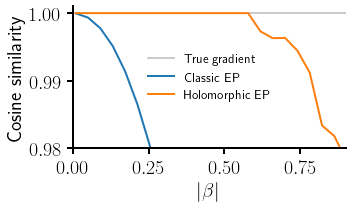

In [7]:
# Fig 2d)

runs = glob.glob('./results/fig2d/*')
runs = sorted(runs, reverse=True)

run = runs[0]
print(run)


data = load_data(run + '/data.pickle')
basic_colors = cm.get_cmap('tab10').colors


rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 10
rcParams['axes.titlesize'] = 25
rcParams['axes.labelsize'] = 5
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string


plt.figure(figsize=(5,3))

axes_name_size = 20
legend_size = 13
label_pad = 5
title = ''

xname = r'$|\beta|$'
xlim = (0.0, 0.9)           
xticks = None 
xticks_label = None
minor_xticks = None   

yname = r'Cosine similarity'
ylim = (0.98, 1.001)
yticks = None 
yticks_label = None
minor_yticks = None 


plt.axhline(y=1.0, color='#BBBBBB', label='True gradient')


for idx, (key, y) in enumerate(data['cos']['total'].items()):
    if key==1:
        legend = 'Classic EP'
    else:
        legend = 'Holomorphic EP'
    plt.plot(data['x'], y, label=legend, linewidth=2, color=basic_colors[idx])




axes = plt.gca()

axes.set_xlabel(xname, fontsize = axes_name_size)
if xticks:
    axes.xaxis.set_ticks(xticks)

if xticks_label:
    axes.set_xticklabels(xticks_label)

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)


# shape of major xticks
axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='major')


# shape of minor xticks
axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='minor')

if minor_xticks:
    axes.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_xticks))
if xlim:
    axes.set_xlim(*xlim)
if ylim:
    axes.set_ylim(*ylim)


axes.set_ylabel(yname, fontsize = axes_name_size)



if yticks:
    axes.yaxis.set_ticks(yticks)

if yticks_label:
    axes.set_yticklabels(yticks_label)

# shape of major yticks
axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                           pad=label_pad, which='major')

# shape of minor yticks
axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                           pad=label_pad, which='minor')

if minor_yticks:
    axes.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_yticks))

plt.title(title)

plt.legend(prop={'size': legend_size}, loc='best', framealpha = 0.0, ncol=1) 


plt.show()
plt.close()

/tmp/ipykernel_3739627/2901820834.py:53: RuntimeWarning: divide by zero encountered in log10
  cos_dissim = - np.log10(1.0 - np.array(dictio['cont_cos']))
/tmp/ipykernel_3739627/2901820834.py:53: RuntimeWarning: invalid value encountered in log10
  cos_dissim = - np.log10(1.0 - np.array(dictio['cont_cos']))
/tmp/ipykernel_3739627/2901820834.py:53: RuntimeWarning: divide by zero encountered in log10
  cos_dissim = - np.log10(1.0 - np.array(dictio['cont_cos']))


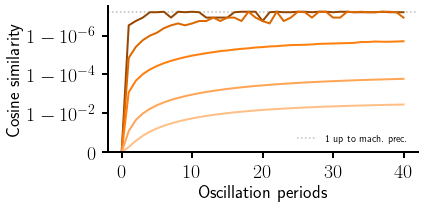

In [5]:
# Fig 3a)

rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['axes.titlesize'] = 40
rcParams['axes.labelsize'] = 25
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string


# basic_colors = [ '#44AA99','#332288', '#882255', '#CC6677', '#88CCEE', '#117733',
#                 '#999933', '#DDCC77', '#CC6677', '#AA4499', "#EE7733", "#EE3377"]

main_color = cm.get_cmap('tab10').colors[1]
# main_color = '#882255'
basic_colors = [lighten_color(main_color, darkn) for darkn in [1.5, 1.2, 1.0, 0.5, 0.7]]

label_values = [r'$T_{\text{osc}}=40$', r'$T_{\text{osc}}=30$', r'$T_{\text{osc}}=20$', r'$T_{\text{osc}}=5$',
                r'$T_{\text{osc}}=10$']

runs = glob.glob('./results/fig3ab/*')

runs = sorted(runs, reverse=True)

all_runs = {run: load_data(f'{run}/data.pickle') for run in runs}




plt.figure(figsize=(6,3))

legend_size = 15
label_pad = 5
title = ''

xname = r'Oscillation periods'
xlim = None
xticks = [0, 10, 20, 30, 40]
minor_xticks = None

yname = r'Cosine similarity'
ylim = (0, 7.5)
yticks = [0, 2, 4, 6] #list(reversed([-1e-6, -1e-4, -1e-2, -1e0]))
yticks_label = [r'$0$', r'$1-10^{-2}$', r'$1-10^{-4}$', r'$1-10^{-6}$'] 
minor_yticks = None 

plt.axhline(y=7.2, color='#BBBBBB', linestyle=':', label='1 up to mach. prec.')

for idx, (run, dictio) in enumerate(all_runs.items()):
    cos_dissim = - np.log10(1.0 - np.array(dictio['cont_cos']))
    cos_dissim = np.nan_to_num(cos_dissim, nan=7.2, posinf=7.2)
    plt.plot(cos_dissim, linewidth=2, color=basic_colors[idx]) # label=label_values[idx],



axes = plt.gca()

axes.set_xlabel(xname, fontsize = 18)
if xticks:
    axes.xaxis.set_ticks(xticks)

# axes.set_yscale('symlog')    

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)



# shape of major xticks
axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='major')


# shape of minor xticks
axes.xaxis.set_tick_params(direction='in', labelsize=35, length=6, width=3, top=True, bottom=True,
                           pad=label_pad, which='minor')

if minor_xticks:
    axes.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_xticks))
if xlim:
    axes.set_xlim(*xlim)
if ylim:
    axes.set_ylim(*ylim)


axes.set_ylabel(yname, fontsize = 18)
if yticks:
    axes.yaxis.set_ticks(yticks)


if yticks_label:
    axes.set_yticklabels(yticks_label)
    

# shape of major yticks
axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='major')

# shape of minor yticks
axes.yaxis.set_tick_params(direction='in', labelsize=35, length=6, width=3, right=False, left=False,
                           pad=label_pad, which='minor')

if minor_yticks:
    axes.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_yticks))

plt.title(title)

plt.legend(framealpha = 0.0)
plt.show()

/tmp/ipykernel_3739627/329547971.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
/ereborfs/laboaxel/miniconda3/envs/plots/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


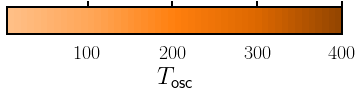

In [6]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

main_color = cm.get_cmap('tab10').colors[1]
# main_color = '#882255'
basic_colors = [lighten_color(main_color, darkn) for darkn in [0.5, 0.7, 1.0, 1.2, 1.5]]

newcmp = LinearSegmentedColormap.from_list('my_list', basic_colors, N=50)
norm = matplotlib.colors.Normalize(vmin=5, vmax=400)

fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=newcmp),
             cax=ax, orientation='horizontal', label=r'$T_{\text{osc}}$')

ax.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=True, bottom=False,
                         pad=label_pad, which='major')
fig.tight_layout()

plt.show()

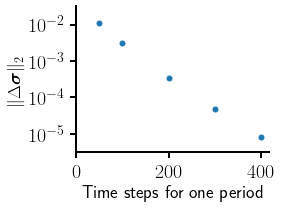

In [11]:
# Fig 3b


rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['axes.titlesize'] = 40
rcParams['axes.labelsize'] = 25
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)


basic_colors = cm.get_cmap('tab10').colors[1]


runs = glob.glob('./results/fig3ab/*')

runs = sorted(runs, reverse=True)

all_runs = {run: load_data(f'{run}/data.pickle') for run in runs}




plt.figure(figsize=(4,3))

legend_size = 15
label_pad = 5
title = ''

xname = r'Time steps for one period'
xlim = None
xticks = [0, 200, 400]
minor_xticks = None


yname = r'$\|\Delta \boldsymbol{\sigma} \|_{2}$'
ylim = (-5.5, -1.5)
yticks = [-5, -4, -3, -2]
yticks_label = [r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$']
minor_yticks = None 


absc = [400, 300, 200, 50, 100]
log_L2s = []

for idx, (run, dictio) in enumerate(all_runs.items()):
    log_L2s.append(np.array(dictio['mean_log_L2s']).mean())
    

    
plt.scatter(absc, log_L2s, s=25)



axes = plt.gca()

axes.set_xlabel(xname, fontsize = 18)
if xticks:
    axes.xaxis.set_ticks(xticks)


axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)



# shape of major xticks
axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='major')


# shape of minor xticks
axes.xaxis.set_tick_params(direction='in', labelsize=35, length=6, width=3, top=True, bottom=True,
                           pad=label_pad, which='minor')

if minor_xticks:
    axes.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_xticks))
if xlim:
    axes.set_xlim(*xlim)
if ylim:
    axes.set_ylim(*ylim)


axes.set_ylabel(yname, fontsize = 18)
if yticks:
    axes.yaxis.set_ticks(yticks)


if yticks_label:
    axes.set_yticklabels(yticks_label)
    

# shape of major yticks
axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='major')

# shape of minor yticks
axes.yaxis.set_tick_params(direction='in', labelsize=35, length=6, width=3, right=False, left=False,
                           pad=label_pad, which='minor')

if minor_yticks:
    axes.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_yticks))

plt.title(title)
plt.show()

./results/fig3c/2022-07-31_16-00-17_xp_mlp_2h256_mnist_msig4_winit5e-2


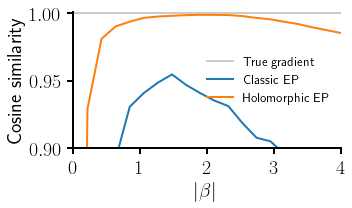

In [83]:
# Fig 3c

runs = glob.glob('./results/fig3c/*')
runs = sorted(runs, reverse=True)

run = runs[0]

print(run)

data = load_data(run + '/data.pickle')


basic_colors = cm.get_cmap('tab10').colors



rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 10
rcParams['axes.titlesize'] = 25
rcParams['axes.labelsize'] = 5
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string


plt.figure(figsize=(5,3))

axes_name_size = 20
legend_size = 13
label_pad = 5
title = ''

xname = r'$|\beta|$'
xlim = (0.0, 4.)
xticks = None
xticks_label = None
minor_xticks = None

yname = r'Cosine similarity'
ylim = (0.9, 1.001)
yticks = None #[0.99, 1.0]
yticks_label = None
minor_yticks = None 


plt.axhline(y=1.0, color='#BBBBBB', label='True gradient')


for idx, (key, y) in enumerate(data['cos']['total'].items()):
    if key==1:
        legend = 'Classic EP'
    else:
        legend = 'Holomorphic EP'
    plt.plot(data['x'], y, label=legend, linewidth=2, color=basic_colors[idx])




axes = plt.gca()


axes.set_xlabel(xname, fontsize = axes_name_size)
if xticks:
    axes.xaxis.set_ticks(xticks)

if xticks_label:
    axes.set_xticklabels(xticks_label)

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)


# shape of major xticks
axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='major')


# shape of minor xticks
axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='minor')

if minor_xticks:
    axes.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_xticks))
if xlim:
    axes.set_xlim(*xlim)
if ylim:
    axes.set_ylim(*ylim)


axes.set_ylabel(yname, fontsize = axes_name_size)



if yticks:
    axes.yaxis.set_ticks(yticks)

if yticks_label:
    axes.set_yticklabels(yticks_label)

# shape of major yticks
axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                           pad=label_pad, which='major')

# shape of minor yticks
axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                           pad=label_pad, which='minor')

if minor_yticks:
    axes.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_yticks))

plt.title(title)

plt.legend(prop={'size': legend_size}, loc='best', framealpha = 0.0, ncol=1)


plt.show()
plt.close()

./results/fig4a/2022-05-11_16-23-48_xpvgg6_soft_mholo1_im32
./results/fig4a/2022-05-11_15-49-34_xpvgg6_max_mhtanh_im32


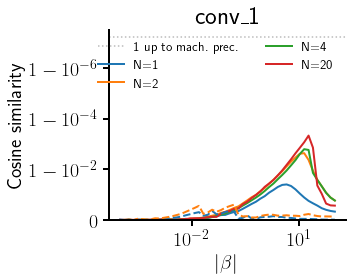

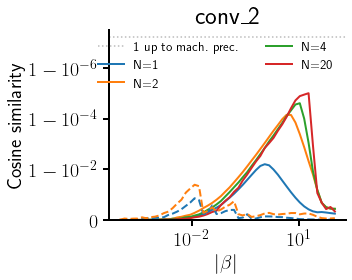

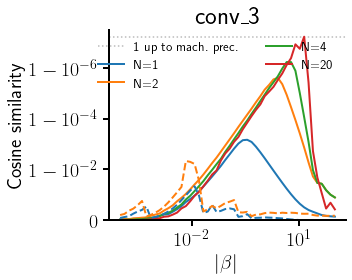

/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))


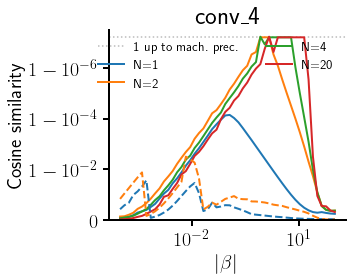

/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))


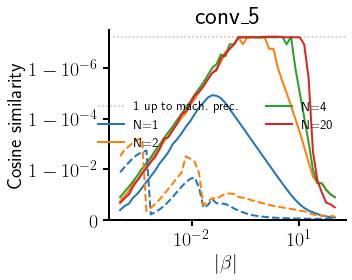

/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))


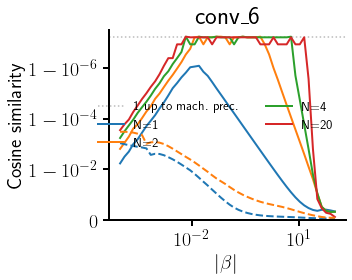

/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:60: RuntimeWarning: divide by zero encountered in log10
  z = - np.log1

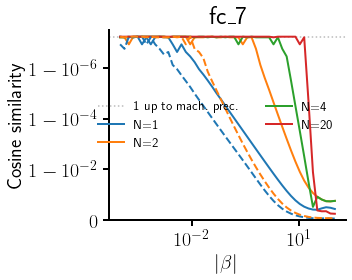

/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: invalid value encountered in log10
  z = - np.log10(1.0 - np.array(y))
/tmp/ipykernel_3739627/694844520.py:53: RuntimeWarning: divide by zero encountered in log10
  z = - np.log10(1.0 - np.array(y))


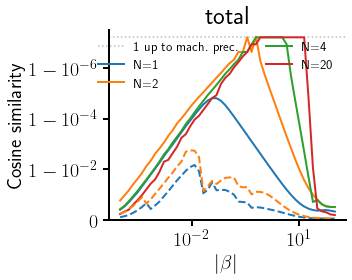

In [7]:
# Fig 4a

runs = glob.glob('./results/fig4a/*')
runs = sorted(runs, reverse=True)
run = runs[0]
run2 = runs[1]
print(run)
print(run2)

data = load_data(run + '/data.pickle')
data2 = load_data(run2 + '/data.pickle')

basic_colors = cm.get_cmap('tab10').colors
# basic_colors = [ '#44AA99','#332288', '#882255', '#CC6677', '#88CCEE', '#117733',
#                 '#999933', '#DDCC77', '#CC6677', '#AA4499', "#EE7733", "#EE3377"]

for (l_name, l_dat1), (_, l_dat2) in zip(data['cos'].items(), data2['cos'].items()):
    
    rcParams['axes.linewidth'] = 2
    rcParams['xtick.labelsize'] = 20
    rcParams['ytick.labelsize'] = 10
    rcParams['axes.titlesize'] = 25
    rcParams['axes.labelsize'] = 5
    rcParams['lines.markersize'] = 2
    rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
    rcParams.update({'figure.autolayout': True})
    rc('text', usetex=True)           # r"$...$" for latex string


    plt.figure(figsize=(5,4))

    axes_name_size = 20
    legend_size = 13
    label_pad = 5
    title = l_name 
    

    xname = r'$|\beta|$'
    xlim = None 
    xticks = None
    xticks_label = None 
    minor_xticks = None   

    yname = r'Cosine similarity'
    ylim = (0, 7.5)
    yticks = [0, 2, 4, 6]
    yticks_label = [r'$0$', r'$1-10^{-2}$', r'$1-10^{-4}$', r'$1-10^{-6}$'] 
    minor_yticks = None 

    plt.axhline(y=7.2, color='#BBBBBB', linestyle=':', label='1 up to mach. prec.')
    
    for idx, (key, y) in enumerate(l_dat1.items()):
        z = - np.log10(1.0 - np.array(y))
        z = np.nan_to_num(z, nan=7.2, posinf=7.2)
        legend = f'N={key}'
        plt.plot(data['x'], z, label=legend, linewidth=2, color=basic_colors[idx])


    for idx, (key, y) in enumerate(l_dat2.items()):
        z = - np.log10(1.0 - np.array(y))
        z = np.nan_to_num(z, nan=7.2, posinf=7.2)
        plt.plot(data['x'], z, linewidth=2, color=basic_colors[idx], linestyle='--')

        
    axes = plt.gca()

#     axes.set_yscale('log')
    axes.set_xscale('log')
    
    axes.set_xlabel(xname, fontsize = axes_name_size)
    if xticks:
        axes.xaxis.set_ticks(xticks)

    if xticks_label:
        axes.set_xticklabels(xticks_label)
        
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)

    
    # shape of major xticks
    axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                               pad=label_pad, which='major')


    # shape of minor xticks
    axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                               pad=label_pad, which='minor')

    if minor_xticks:
        axes.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_xticks))
    if xlim:
        axes.set_xlim(*xlim)
    if ylim:
        axes.set_ylim(*ylim)


    axes.set_ylabel(yname, fontsize = axes_name_size)



    if yticks:
        axes.yaxis.set_ticks(yticks)
    
    if yticks_label:
        axes.set_yticklabels(yticks_label)
    
    # shape of major yticks
    axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                               pad=label_pad, which='major')

    # shape of minor yticks
    axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                               pad=label_pad, which='minor')

    if minor_yticks:
        axes.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_yticks))

    plt.title(title)
    
    plt.legend(prop={'size': legend_size}, loc='best', framealpha = 0.0, ncol=2) # bbox_to_anchor=(0.1, 0.2), 


    plt.show()
    plt.close()  

./results/fig4b/2022-05-16_14-22-26_xpvgg6_soft_mholo1_im32


/tmp/ipykernel_2784044/1336795366.py:56: RuntimeWarning: divide by zero encountered in log10
  data_to_plot1.append(np.nan_to_num(-np.log10(1-cosines1[beta_idx]), nan=7.2, posinf=7.2))


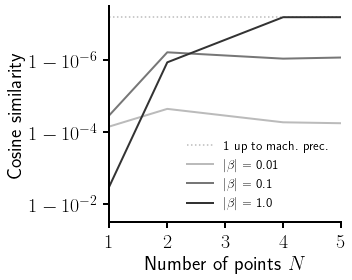

In [86]:
# Fig 4b

runs = glob.glob('./results/fig4b/*')
runs = sorted(runs, reverse=True)
run = runs[0]
print(run)


data = load_data(run + '/data.pickle')

main_color = '#BBBBBB'
basic_colors = [lighten_color(main_color, darkn) for darkn in [1.0, 2.0, 3.0, 1.8]]


rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 10
rcParams['axes.titlesize'] = 25
rcParams['axes.labelsize'] = 5
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string


plt.figure(figsize=(5,4))

axes_name_size = 20
legend_size = 13
label_pad = 5
title = ''

xname = r'Number of points $N$'
xlim = (1, 5)
xticks = [1, 2, 3, 4, 5]
xticks_label = None
minor_xticks = None

yname = r'Cosine similarity'
ylim = (1.5, 7.5)
yticks = [2, 4, 6]
yticks_label = [r'$1-10^{-2}$', r'$1-10^{-4}$', r'$1-10^{-6}$'] 
minor_yticks = None 

plt.axhline(y=7.2, color='#BBBBBB', linestyle=':', label='1 up to mach. prec.')

for idx, beta_idx in enumerate([0, 1, 2]):

    absc1 = []
    data_to_plot1 = []


    for n1, cosines1 in data['cos']['total'].items():

        absc1.append(int(n1))    
        data_to_plot1.append(np.nan_to_num(-np.log10(1-cosines1[beta_idx]), nan=7.2, posinf=7.2))

    plt.plot(absc1, data_to_plot1, label=r'$|\beta|=$'+f' {str(round(data["x"][beta_idx], 3))}',
             linewidth=2, color=basic_colors[idx])


axes = plt.gca()

# axes.set_yscale('log')


axes.set_xlabel(xname, fontsize = axes_name_size)
if xticks:
    axes.xaxis.set_ticks(xticks)

if xticks_label:
    axes.set_xticklabels(xticks_label)

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)


# shape of major xticks
axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='major')


# shape of minor xticks
axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                           pad=label_pad, which='minor')

if minor_xticks:
    axes.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_xticks))
if xlim:
    axes.set_xlim(*xlim)
if ylim:
    axes.set_ylim(*ylim)


axes.set_ylabel(yname, fontsize = axes_name_size)



if yticks:
    axes.yaxis.set_ticks(yticks)

if yticks_label:
    axes.set_yticklabels(yticks_label)

# shape of major yticks
axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                           pad=label_pad, which='major')

# shape of minor yticks
axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                           pad=label_pad, which='minor')

if minor_yticks:
    axes.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_yticks))

plt.title(title)

plt.legend(prop={'size': legend_size}, loc='best', framealpha = 0.0, ncol=1)


plt.show()
plt.close()

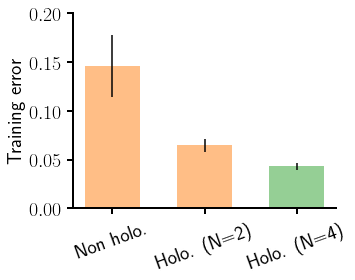

In [18]:
# Fig 4c

rcParams['axes.linewidth'] = 2
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['axes.titlesize'] = 40
rcParams['axes.labelsize'] = 25
rcParams['lines.markersize'] = 2
rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'
rcParams.update({'figure.autolayout': True})
rc('text', usetex=True)           # r"$...$" for latex string

basic_colors = cm.get_cmap('tab10').colors

run_types = ['non_holo_N2', 'holo_N2', 'holo_N4']

metrics = ['tr_acc']

data_to_plot = []
data_err = []

run_labels = ['Non holo.', 
              'Holo. (N=2)', 
              'Holo. (N=4)']



for run_type in run_types:
    
    runs = glob.glob(f'./results/fig4c/{run_type}/*')
    
    all_runs = [load_data(f'{run}/data.pickle') for run in runs]

    for metric in metrics:

        agg = np.array( [dictio[metric] for dictio in all_runs] )
        agg_max = np.max(agg, axis=1)
        av, std = np.mean(agg_max), np.std(agg_max)
        
        data_to_plot.append(1.0 - av)
        data_err.append(2*std)
        



legend_size = 12
label_pad = 5
title = ''

xname = ''
xlim = None   
xticks = np.arange(len(run_types))        
xticks_label = run_labels
minor_xticks = None   

yname = r'Training error'
ylim = (0.0, 0.2)
yticks = None
minor_yticks = None 



for metric in metrics:

    plt.figure(figsize=(5,4))

    absc = np.arange(len(run_types))
    plt.bar(absc, data_to_plot, yerr=data_err, color = [basic_colors[k] for k in [1,1,2]],
            align='center', alpha=0.5, ecolor='black', width=0.6)

    axes = plt.gca()

    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    
    #axes.set_xlabel(xname, fontsize = 20)
    if xticks is not None:
        axes.xaxis.set_ticks(xticks)
    if xticks_label:
        axes.set_xticklabels(xticks_label, rotation=20)

    

    
    # shape of major xticks
    axes.xaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, top=False, bottom=True,
                               pad=label_pad, which='major')


    # shape of minor xticks
    axes.xaxis.set_tick_params(direction='in', labelsize=35, length=6, width=3, top=True, bottom=True,
                               pad=label_pad, which='minor')

    if minor_xticks:
        axes.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_xticks))
    if xlim:
        axes.set_xlim(*xlim)
    if ylim:
        axes.set_ylim(*ylim)


    axes.set_ylabel(yname, fontsize = 20)
    if yticks:
        axes.yaxis.set_ticks(yticks)


    # shape of major yticks
    axes.yaxis.set_tick_params(direction='out', labelsize=20, length=6, width=2, right=False, left=True,
                               pad=label_pad, which='major')

    # shape of minor yticks
    axes.yaxis.set_tick_params(direction='in', labelsize=35, length=6, width=3, right=True, left=True,
                               pad=label_pad, which='minor')

    if minor_yticks:
        axes.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(minor_yticks))

    plt.title(title)
    plt.show()

In [91]:
# Table 1

settings = ['no_noise/classic_ep_1e-1', 'no_noise/classic_ep_4e-1', 'no_noise/hep', 'no_noise/continuous_hep',
            'noise/classic_ep_1e-1', 'noise/classic_ep_4e-1', 'noise/hep', 'noise/continuous_hep']

for setting in settings:
    runs = glob.glob(f'./results/table1/{setting}/*')

    metrics = ['tr_acc', 'val_acc']

    print('\n', setting, '\n')

    all_runs = [load_data(f'{run}/data.pickle') for run in runs]

    for metric in metrics:

        agg = np.array( [dictio[metric] for dictio in all_runs] )
        agg_min = np.min( 100*(1.0 - agg), axis=1)
        av, std = np.mean(agg_min), np.std(agg_min)

        print(f'{metric.replace("acc", "err")}:\t{round(av, 2)} +/- {round(std, 2)}')



 no_noise/classic_ep_1e-1 

tr_err:	0.05 +/- 0.02
val_err:	1.87 +/- 0.01

 no_noise/classic_ep_4e-1 

tr_err:	0.19 +/- 0.05
val_err:	2.24 +/- 0.05

 no_noise/hep 

tr_err:	0.02 +/- 0.01
val_err:	1.97 +/- 0.08

 no_noise/continuous_hep 

tr_err:	0.11 +/- 0.01
val_err:	2.05 +/- 0.02

 noise/classic_ep_1e-1 

tr_err:	88.76 +/- 0.0
val_err:	88.65 +/- 0.0

 noise/classic_ep_4e-1 

tr_err:	1.96 +/- 0.2
val_err:	3.01 +/- 0.1

 noise/hep 

tr_err:	0.14 +/- 0.03
val_err:	1.96 +/- 0.07

 noise/continuous_hep 

tr_err:	0.13 +/- 0.03
val_err:	1.91 +/- 0.16


In [20]:
# Table 2

settings = ['bp_cif10', 'ep_cif10',
            'bp_cif100', 'ep_cif100',
            'bp_im32', 'ep_im32']

for setting in settings:
    runs = glob.glob(f'./results/table2/{setting}/*')

    metrics = ['val_acc', 'val_acc5']

    print('\n', setting, '\n')

    all_runs = [load_data(f'{run}/data.pickle') for run in runs]

    for metric in metrics:

        agg = np.array( [dictio[metric] for dictio in all_runs] )
        agg_max = np.max(agg, axis=1)
        av, std = np.mean(agg_max), np.std(agg_max)

        print(f'{metric}:\t{round(av, 3)} +/- {round(std, 3)}')



 bp_cif10 

val_acc:	0.883 +/- 0.001
val_acc5:	0.994 +/- 0.0

 ep_cif10 

val_acc:	0.886 +/- 0.002
val_acc5:	0.995 +/- 0.0

 bp_cif100 

val_acc:	0.62 +/- 0.005
val_acc5:	0.861 +/- 0.001

 ep_cif100 

val_acc:	0.616 +/- 0.001
val_acc5:	0.86 +/- 0.001

 bp_im32 

val_acc:	0.372 +/- 0.004
val_acc5:	0.609 +/- 0.001

 ep_im32 

val_acc:	0.365 +/- 0.003
val_acc5:	0.608 +/- 0.004
